In [3]:
# Importing the necessary libraries

import numpy as np 
from matplotlib import pyplot as plt 
import keras 
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
import os 
from sklearn.metrics import confusion_matrix
import cv2
import matplotlib.image as mpimg
import seaborn as sns

Using TensorFlow backend.
C:\Users\SAWON\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SAWON\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SAWON\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SAWON\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [4]:
TRAIN_PATH = "Dataset/Train"
TEST_PATH = "Dataset/Test"

In [136]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)))
model.add((Conv2D(64, (3, 3), activation = 'relu')))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation = 'sigmoid', name='visualized_layer'))

model.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 54, 54, 64)       

In [6]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./ 255,
    shear_range = 0.2,
    zoom_range = 0.2, 
    horizontal_flip = True)

test_datagen = image.ImageDataGenerator(rescale = 1. / 255)

In [7]:
img_height = 224
img_width = 224

train_generator = train_datagen.flow_from_directory(
    'Dataset/Train Data',
    target_size = (img_height, img_width), 
    batch_size = 32, 
    class_mode = 'binary'
)

train_generator.class_indices
#test_generator[0]

Found 284 images belonging to 2 classes.


{'Covid': 0, 'Non-Covid': 1}

In [8]:
test_generator = test_datagen.flow_from_directory(
    'Dataset/Test Data',
    target_size = (img_height, img_width),
    batch_size = 32, 
    class_mode = 'binary')

test_generator.class_indices

Found 120 images belonging to 2 classes.


{'Covid': 0, 'Non-Covid': 1}

In [9]:
checkpointer = keras.callbacks.ModelCheckpoint(model, verbose = 1, save_best_only = True)

callback = [keras.callbacks.EarlyStopping(patience = 2, monitor = 'val_accuracy'),
            keras.callbacks.TensorBoard(histogram_freq = 0)]

In [10]:
hist = model.fit_generator(
    train_generator, 
    steps_per_epoch = 8, 
    epochs = 10, 
    validation_data = test_generator, 
    validation_steps = 2,
    verbose = 1,
    callbacks = callback)




Epoch 1/10
8/8 [==============================] - 109s 14s/step - loss: 1.2954 - accuracy: 0.4921 - val_loss: 0.6936 - val_accuracy: 0.3906

Epoch 2/10
8/8 [==============================] - 86s 11s/step - loss: 0.6850 - accuracy: 0.4881 - val_loss: 0.6809 - val_accuracy: 0.4821
Epoch 3/10
8/8 [==============================] - 84s 11s/step - loss: 0.5513 - accuracy: 0.7656 - val_loss: 0.4038 - val_accuracy: 0.7969
Epoch 4/10
8/8 [==============================] - 79s 10s/step - loss: 0.3917 - accuracy: 0.8333 - val_loss: 0.3882 - val_accuracy: 0.9464
Epoch 5/10
8/8 [==============================] - 81s 10s/step - loss: 0.3176 - accuracy: 0.8889 - val_loss: 0.2698 - val_accuracy: 0.9531
Epoch 6/10
8/8 [==============================] - 77s 10s/step - loss: 0.2647 - accuracy: 0.8968 - val_loss: 0.2216 - val_accuracy: 0.8750
Epoch 7/10
8/8 [==============================] - 79s 10s/step - loss: 0.2488 - accuracy: 0.9194 - val_loss: 0.1921 - val_accuracy: 0.9688
Epoch 8/10
8/8 [======

In [11]:
model.save("my_model.h5")

In [12]:
model.evaluate_generator(train_generator)

[0.17465364933013916, 0.9330986142158508]

In [13]:
model.evaluate_generator(test_generator)

[0.11369850486516953, 0.9750000238418579]

In [14]:
model = load_model('my_model.h5')
y_test = []
y_actual = []


In [15]:
import os 

for i in os.listdir("Dataset/Test Data/Non-Covid/"):
    img = image.load_img("Dataset/Test Data/Non-Covid/" + i, target_size = (224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    p = model.predict_classes(img)
    y_test.append(p[0, 0])
    y_actual.append(1)
    
for i in os.listdir("Dataset/Test Data/Covid/"):
    img = image.load_img("Dataset/Test Data/Covid/" + i, target_size = (224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis = 0)
    p = model.predict_classes(img)
    y_test.append(p[0, 0])
    y_actual.append(0)

In [16]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual, y_test)


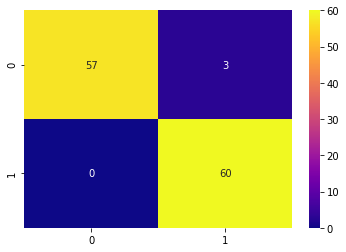

In [18]:
import seaborn as sns
sns.heatmap(cm, cmap = 'plasma', annot = True)
plt.show()

In [199]:

def cam(img_path):
    from keras.applications.vgg16 import VGG16
    import matplotlib.image as mpimg
    from keras import backend as K
    import matplotlib.pyplot as plt
    import pandas as pd
    %matplotlib inline
    K.clear_session()
    
    model = VGG16(weights='imagenet')
    img=mpimg.imread(img_path)
    plt.imshow(img)
    from keras.preprocessing import image
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    from keras.applications.vgg16 import preprocess_input
    x = preprocess_input(x)
    preds = model.predict(x)
   # predictions = pd.DataFrame(decode_predictions(preds, top=3)[0],columns=['col1','category','probability']).iloc[:,1:]
    argmax = np.argmax(preds[0])
    output = model.output[:, argmax]
    last_conv_layer = model.get_layer('block5_conv3')
    grads = K.gradients(output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(512):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    import cv2
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    hif = .8
    superimposed_img = heatmap * hif + img
    output = 'Dataset/Test Data/Covid/output2.jpg'
    cv2.imwrite(output, superimposed_img)
    
    mymodel = load_model('my_model.h5')
    rslt = mymodel.predict(x)
    #print(rslt)
    if rslt[0][0] == 1:
        prediction = "Non-COVID"
    else:
        prediction = "COVID"
    img=mpimg.imread(output)
    plt.imshow(img)
    plt.axis('off')
    plt.title(prediction)
    return None

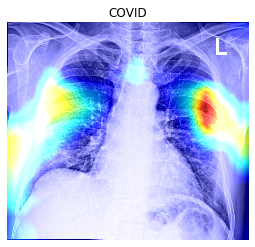

In [200]:
cam('Dataset/Test Data/Covid/covid-19-pneumonia-30-PA.jpg')

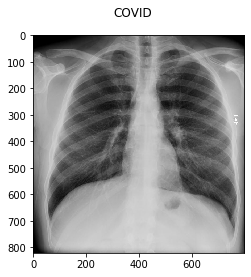

In [204]:
img_src = 'Dataset/Test Data/Covid/covid-19-pneumonia-53.jpg'
img = cv2.imread(img_src)
mymodel = load_model('my_model.h5')
img_pre = image.load_img(img_src, target_size = (224, 224))
img_pred = image.img_to_array(img_pre)
img_pred = np.expand_dims(img_pred, axis = 0)
rslt = mymodel.predict(img_pred)

ind = train_generator.class_indices

if rslt[0][0] == 1:
    prediction = "Non-COVID"
else:
    prediction = "COVID"

target_width = 50
target_height = 50
target_size = (target_width, target_height)

img = cv2.resize(img, target_size)
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
fig.suptitle(prediction, fontsize=12)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)

In [ ]:
gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

In [150]:
#print(model.layers[-7].output)
cam_model  = Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))
img_model  = Model(inputs=model.input,outputs=(model.layers[-7].output,model.layers[-1].output))

In [151]:
img_model.summary()

Model: "model_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9_input (InputLayer)  (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 54, 54, 64)        0  

{'Covid': 0, 'Non-Covid': 1}


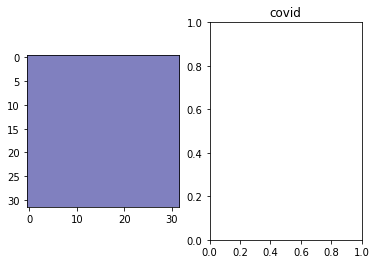

In [170]:
fmaps=cam_model.predict(img_pred)[0]
fmaps.reshape(64,1)
prob=img_model.predict(img_pred)
ind = train_generator.class_indices
pred=np.argmax(prob[0])
print(ind)

w=gap_weights[:pred]

cam=fmaps.dot(w)

cam=sp.ndimage.zoom(cam,(32,32),order=1)



target_width = 50
target_height = 50
target_size = (target_width, target_height)
#print(img.)
#img = cv2.resize(img, (50,50))  # resize to normalize data size
img = img.reshape(1, target_width, target_height, 3)


fig, ax = plt.subplots()
#fig.suptitle(prediction, fontsize=12)

np_img = mpimg.imread(img_src)
plt.imshow(np_img)
plt.subplot(1,2,1)
#plt.imshow(img, alpha=0.8)
plt.imshow(cam, cmap='jet', alpha=0.5)
plt.subplot(1,2,2)
plt.title('covid')

plt.show()
